In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df= load_iris()

In [12]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
df_iris = pd.DataFrame(df.data,columns=df.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
#Create feature and target arrays

X=df.data
Y=df.target

In [28]:
#Spliting the data into training and testing

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=7)

In [29]:
#Model Building

knn=KNeighborsClassifier(n_neighbors=4)


#fitting the Model
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [30]:
# Predicting from the Model

Y_pred=knn.predict(X_test)
print(Y_pred)

[2 1 0 1 1 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0 1 2 1 1 2 2 1 1 2 2]


In [31]:
# Making the Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[ 7,  0,  0],
       [ 0, 12,  0],
       [ 0,  2,  9]])

In [42]:
# 15-fold (cv=15) cross-validation with K=4 (n_neighbors=4) for KNN (the n_neighbors parameter)

# Instantiate model
knn = KNeighborsClassifier(n_neighbors=4)

# cross_val_score takes care of splitting X and y into the 15 folds that's why we pass X and y entirely instead of X_train and y_train
scores = cross_val_score(knn, X, Y, cv=15, scoring='accuracy')
print(scores)

[1.  1.  0.9 1.  1.  1.  0.7 1.  1.  0.9 0.9 1.  1.  1.  1. ]


In [43]:
# Mean Score
print(scores.mean())

0.9600000000000001


In [44]:


from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(Y_test,Y_pred))

Accuracy: 0.9333333333333333


In [46]:
# Searching for an optimal value of K

#list of the K

k_range=range(1,50)

#List of the scores

k_scores=[]

#Looping through values of K

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors = k)
    scores=cross_val_score(knn,X_train,Y_train,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    
#printing the scores

print(k_scores)

[0.9749999999999999, 0.9666666666666666, 0.9749999999999999, 0.9666666666666666, 0.9833333333333332, 0.9749999999999999, 0.9749999999999999, 0.9666666666666666, 0.9833333333333332, 0.9833333333333332, 0.9833333333333332, 0.9833333333333332, 0.9916666666666666, 0.9916666666666666, 0.9916666666666666, 0.9833333333333332, 0.9833333333333332, 0.975, 0.9916666666666666, 0.9666666666666666, 0.975, 0.975, 0.9833333333333332, 0.975, 0.9833333333333332, 0.975, 0.9833333333333332, 0.9833333333333332, 0.9833333333333332, 0.9833333333333332, 0.9833333333333332, 0.9916666666666666, 0.9833333333333332, 0.975, 0.975, 0.975, 0.975, 0.9666666666666666, 0.9583333333333333, 0.9583333333333333, 0.9666666666666666, 0.95, 0.95, 0.9583333333333333, 0.9583333333333333, 0.9416666666666667, 0.9416666666666667, 0.925, 0.925]


In [47]:
print(scores)

[0.83333333 1.         0.91666667 0.83333333 0.91666667 0.91666667
 0.91666667 0.91666667 1.         1.        ]


Text(42.0, 0.5, 'Cross validation Accuracy')

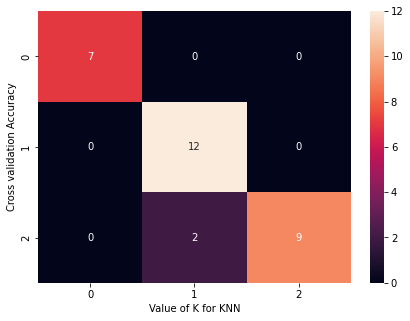

In [48]:
#Plot
# plt.plot(k_range,k_scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Cross validation Accuracy')
# plt.show()

import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross validation Accuracy')

In [49]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.86      1.00      0.92        12
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

